# Predicting Sale Price of Houses using Machine Learning (Regression Modelling)

The aim is to build a regression model to predict the sale price of houses, given all the features selected.

The dataset has sale price of houses and various features related to the house, location and sale.

#### Import packages

In [1]:
# import all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Read datasets

There are two datasets train and test as is required for modelling purposes. Model is built on train and then accuracy is validated on test data

In [2]:
# read train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# print the shape of test and train datasets
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


Test data has 1 column less as it excludes column titled SalePrice. This is because SalePrice is the target for our model, which we are trying to predict.

In [3]:
# print the top rows of train data
pd.set_option('display.max_columns', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [5]:
# print the top rows of test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [7]:
# Print data type of columns and check for non-null count
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Exploratory Data Analysis (EDA)

#### Subset numeric columns

In [8]:
# Create a list of numeric data types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# Select columns that are of numeric data type using the variable "numerics"
numeric_features = train.select_dtypes(include=numerics)

# print shape and top rows of numeric variables
print(numeric_features.shape)
numeric_features.head()

(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


There are 37 numeric variables and 1 target (SalePrice)

In [53]:
# Summarize numeric variables/columns
numeric_features.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1515.463699,1.565068,1.767123,180921.195890
std,1.382997,30.202904,20.645407,438.705324,525.480383,0.550916,0.747315,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,1129.500000,1.000000,1.000000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1464.000000,2.000000,2.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1776.750000,2.000000,2.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,5642.000000,3.000000,4.000000,755000.000000


#### Subset categorical columns

In [10]:
# Create a list of categorical data types
# Select columns that are of categorical data type using 'object'
categorical_features= train.select_dtypes(include=['object'])

# print the shape and top rows of categorical variables
print(categorical_features.shape)
categorical_features.head()

(1460, 42)


,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


There are 42 categorical variables

In [11]:
# Summarize categorical variables/columns using describe method
categorical_features.describe()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1460,1460,1460,1460,1460,7,281,54,1460,1460
unique,5,2,2,4,4,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,5,7,4,6,6,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


#### Find the skewness in data

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

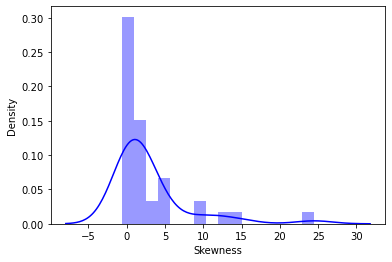

In [12]:
# Skewness plot
sns.distplot(train.skew(), color="blue", axlabel= "Skewness")

#### Distribution of House price

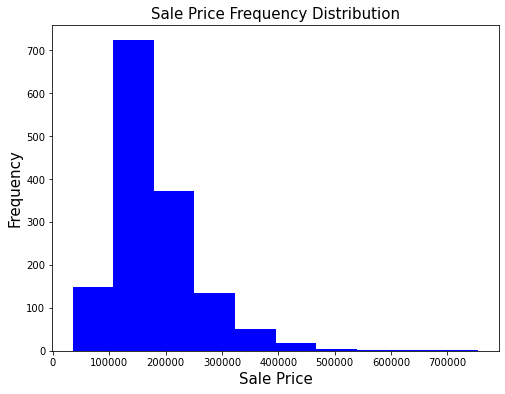

In [13]:
# Histogram of target variable (SalePrice column in train data)
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Sale Price Frequency Distribution", fontsize=15)
plt.hist(train["SalePrice"], color= "blue")
plt.show()

In [14]:
# Create a target variable list (SalePrice column in train data) and take the log of it to normalise data and limit outliers
target= np.log(train["SalePrice"])

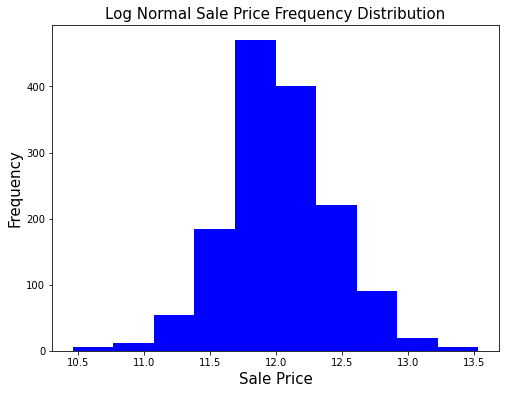

In [15]:
# Lognormal histogram of target variable (SalePrice column in train data)
plt.figure(figsize=(8,6))
plt.xlabel("Sale Price", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Log Normal Sale Price Frequency Distribution", fontsize=15)
plt.hist(target, color= "blue")
plt.show()

Obtain the correlation of numeric variables with target (SalePrice) and with other numeric variables

In [16]:
# Obtain correlation of numeric variables and target, and view them in descending order.
correlation= numeric_features.corr()

correlation["SalePrice"].sort_values(ascending=False)*100

SalePrice        100.000000
OverallQual       79.098160
GrLivArea         70.862448
GarageCars        64.040920
GarageArea        62.343144
TotalBsmtSF       61.358055
1stFlrSF          60.585218
FullBath          56.066376
TotRmsAbvGrd      53.372316
YearBuilt         52.289733
YearRemodAdd      50.710097
GarageYrBlt       48.636168
MasVnrArea        47.749305
Fireplaces        46.692884
BsmtFinSF1        38.641981
LotFrontage       35.179910
WoodDeckSF        32.441344
2ndFlrSF          31.933380
OpenPorchSF       31.585623
HalfBath          28.410768
LotArea           26.384335
BsmtFullBath      22.712223
BsmtUnfSF         21.447911
BedroomAbvGr      16.821315
ScreenPorch       11.144657
PoolArea           9.240355
MoSold             4.643225
3SsnPorch          4.458367
BsmtFinSF2        -1.137812
BsmtHalfBath      -1.684415
MiscVal           -2.118958
Id                -2.191672
LowQualFinSF      -2.560613
YrSold            -2.892259
OverallCond       -7.785589
MSSubClass        -8

<AxesSubplot:title={'center':'Correlation of Numeric Feature with Sale Price'}>

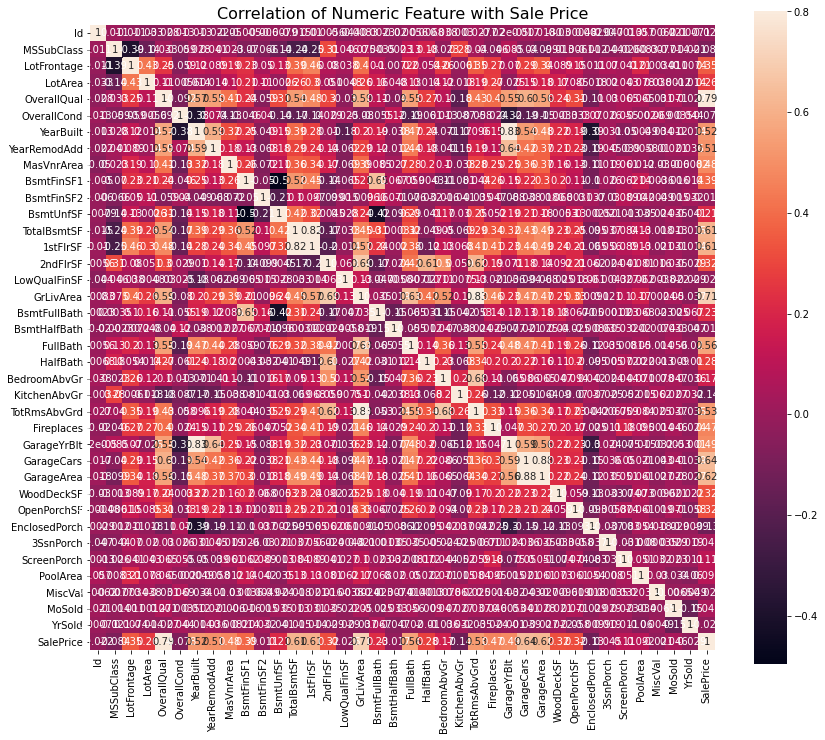

In [17]:
# Correlation Heat Map
plt.figure(figsize=(14,12))
plt.title("Correlation of Numeric Feature with Sale Price", y=1, size=16)
sns.heatmap(correlation, annot=True, square= True, vmax=0.8)

Identify variables that are highly correlated with target variable (e.g. 0.7 and above). Of the variables that are highly correlated with target variable, drop variables that are also highly correlated with one another. For example, both GarageCars and GarageArea has high correlation with SalePrice with correlation of 0.64 and 0.62 respectively. However, from the heat map, GarageCars and GarageArea also have high correlation with one another (about 0.8). We drop the one with lower correlation to the target variable and therefore drop GarageArea.

In [18]:
# Identify variables that are highly correlated with target variable (e.g. 0.5 and above or below -0.5)
# Of the variables that are highly correlated with target variable, drop variables that are also highly correlated with one another
train.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"], axis=1, inplace=True)
test.drop(["GarageArea", "1stFlrSF", "TotRmsAbvGrd"], axis=1, inplace=True)

#### Missing value Treatment - Remove variable with excess Nulls

In [19]:
pd.options.display.max_rows
train_null = train.isnull().sum()
train_null.sort_values()

Id                 0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
                ... 
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
Length: 77, dtype: int64

In [20]:
print(train.isnull().sum().to_dict())

{'Id': 0, 'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 259, 'LotArea': 0, 'Street': 0, 'Alley': 1369, 'LotShape': 0, 'LandContour': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 0, 'MasVnrArea': 8, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 0, 'BsmtCond': 0, 'BsmtExposure': 0, 'BsmtFinType1': 0, 'BsmtFinSF1': 0, 'BsmtFinType2': 0, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 690, 'GarageType': 0, 'GarageYrBlt': 81, 'GarageFinish': 0, 'GarageCars': 0, 'Garag

In [21]:
print(test.isnull().sum().to_dict())

{'Id': 0, 'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 227, 'LotArea': 0, 'Street': 0, 'Alley': 1352, 'LotShape': 0, 'LandContour': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 0, 'MasVnrArea': 15, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 0, 'BsmtCond': 0, 'BsmtExposure': 0, 'BsmtFinType1': 0, 'BsmtFinSF1': 1, 'BsmtFinType2': 0, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 730, 'GarageType': 0, 'GarageYrBlt': 78, 'GarageFinish': 0, 'GarageCars': 0, 'Gara

In [22]:
# Delete categorical columns with high proportion of missing values from the dataset
train.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)
test.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)

In [23]:
# Delete numeric columns/ features which have low correlation with target variable from the train data
train.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [24]:
# Delete numeric columns/ features which have low correlation with target variable from the test data
test.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [25]:
# Check shape of train data and test data
train.shape, test.shape

((1460, 45), (1459, 44))

Train data is left with 45 columns. Of which, 1 is the target variable, 7 are numeric variables and 37 are cateogrical variables (originally 42 categorical columns, minus 5 with high proportion of null values).

In [26]:
# Head of categorical features
categorical_features.head()

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [27]:
# Get the remaining numeric variables
numeric_features= train.select_dtypes(include= [np.number])
numeric_features.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,2003,856,1710,2,2,208500
1,6,1976,1976,1262,1262,2,2,181500
2,7,2001,2002,920,1786,2,2,223500
3,7,1915,1970,756,1717,1,3,140000
4,8,2000,2000,1145,2198,2,3,250000


Left with 7 numeric variables and 1 target variable (SalePrice)

In [28]:
# Get the correlation (of shortened list of numeric features)
correlation= numeric_features.corr()
correlation["SalePrice"].sort_values(ascending=False)*100

SalePrice       100.000000
OverallQual      79.098160
GrLivArea        70.862448
GarageCars       64.040920
TotalBsmtSF      61.358055
FullBath         56.066376
YearBuilt        52.289733
YearRemodAdd     50.710097
Name: SalePrice, dtype: float64

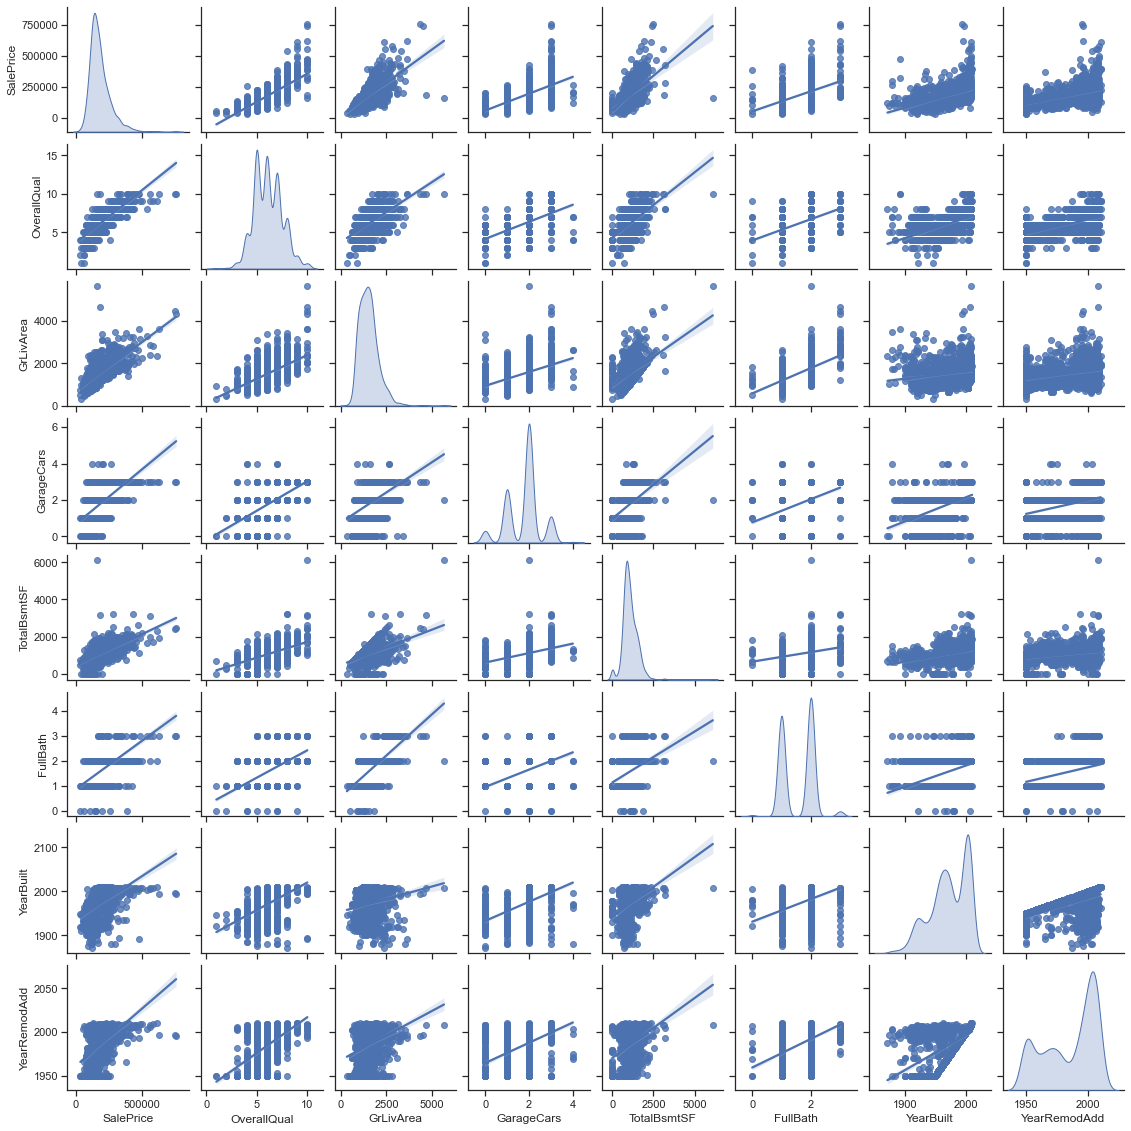

In [29]:
# Pairplot of numeric variables
sns.set(style="ticks", color_codes=True)
columns= ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF","FullBath", 
         "YearBuilt", "YearRemodAdd"]
sns.pairplot(train[columns], height = 2, diag_kind="kde", kind="reg")
plt.show()

Visually, based on first row, we can tell that chosen numeric features are correlated with saleprice.

## Feature Engineering

In [30]:
# Label encode remaining 37 categorical variables
from sklearn.preprocessing import LabelEncoder

cols= ('Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSZoning')

# Process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]= lbl.transform(list(train[c].values))
    
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c]= lbl.transform(list(test[c].values))

# Shape
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (1460, 45)
Shape all_data: (1459, 44)


No change to shape i.e. there are 45 columns in train data. Of which, 1 is the target variable, 7 are numeric variables and 37 are cateogrical variables.

Instead of label encoding, we might want to explore the use of one-hot encoding for nominal data and label encoding only for ordinal data. Otherwise, it might assign some categories (in a column with nominal data) with higher importance than another, even though they should be of equal importance given that they are nominal.

In [31]:
# Check first few rows to see how data has been transformed. All data are now numeric data.
train.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,FullBath,KitchenQual,Functional,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,4,0,5,2,2,0,5,7,2003,2003,1,1,12,13,1,2,4,2,2,4,3,2,6,856,1,0,1,4,1710,2,2,6,1,2,2,5,5,2,8,4,208500
1,3,1,3,3,2,0,24,1,2,0,2,6,1976,1976,1,1,8,8,2,3,4,1,2,4,1,0,6,1262,1,0,1,4,1262,2,3,6,1,2,2,5,5,2,8,4,181500
2,3,1,0,3,4,0,5,2,2,0,5,7,2001,2002,1,1,12,13,1,2,4,2,2,4,2,2,6,920,1,0,1,4,1786,2,2,6,1,2,2,5,5,2,8,4,223500
3,3,1,0,3,0,0,6,2,2,0,5,7,1915,1970,1,1,13,15,2,3,4,0,4,1,3,0,6,756,1,2,1,4,1717,1,2,6,5,3,3,5,5,2,8,0,140000
4,3,1,0,3,2,0,15,2,2,0,5,8,2000,2000,1,1,12,13,1,2,4,2,2,4,0,2,6,1145,1,0,1,4,2198,2,2,6,1,2,3,5,5,2,8,4,250000


In [32]:
# Get correlation of all variables
correlation2= train.corr()

correlation2["SalePrice"].sort_values(ascending=False)*100

SalePrice        100.000000
OverallQual       79.098160
GrLivArea         70.862448
GarageCars        64.040920
TotalBsmtSF       61.358055
FullBath          56.066376
YearBuilt         52.289733
YearRemodAdd      50.710097
Foundation        38.247899
CentralAir        25.132816
GarageCond        24.670527
Electrical        23.494494
PavedDrive        23.135695
RoofStyle         22.240529
SaleCondition     21.309203
Neighborhood      21.085147
GarageQual        20.596283
HouseStyle        18.016262
RoofMatl          13.238311
ExterCond         11.730266
Functional        11.532792
Exterior2nd       10.376554
Exterior1st       10.355101
BsmtCond           9.150303
Condition1         9.115491
BsmtFinType2       7.271749
LandSlope          5.115225
Street             4.103554
MasVnrType         1.821577
LandContour        1.545324
Condition2         0.751273
SaleType          -5.491148
LotConfig         -6.739602
BldgType          -8.559061
BsmtFinType1      -9.873437
Heating           -9

In [33]:
# Drop uncorrelated categorical variables (i.e. correlation with sales price within -0.5 to 0.5 dropped)
train.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

test.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

In [34]:
train.shape, test.shape

((1460, 11), (1459, 10))

We are left with 1 target variable and 10 features

In [35]:
correlation_one= train.corr()
correlation_one["SalePrice"].sort_values(ascending=False)*100

# SalePrice   : What is the price of a house
# OverallQual : Overall material and finish quality
# GrLivArea   : Above grade Ground living area square feet
# GarageCars  : Size of garage in car capacity
# TotalBsmtSF : Total Square feet of basement area
# FullBath    : Full bathroom above grade
# YearBuilt   : Original Construction date
# YearRemodAdd: Remodel date
# KitchenQual : Kitchen Quality
# BsmtQual    : Height of the basement
# ExterQual   : Exterior material Quality

SalePrice       100.000000
OverallQual      79.098160
GrLivArea        70.862448
GarageCars       64.040920
TotalBsmtSF      61.358055
FullBath         56.066376
YearBuilt        52.289733
YearRemodAdd     50.710097
KitchenQual     -58.918878
BsmtQual        -59.373392
ExterQual       -63.688369
Name: SalePrice, dtype: float64

In [36]:
# Check that chosen features are not highly correlated with one another
corrMatrix = train.corr()
corrMatrix

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice
OverallQual,1.000000,0.572323,0.550684,-0.634319,-0.599639,0.537808,0.593007,0.550600,-0.555348,0.600671,0.790982
YearBuilt,0.572323,1.000000,0.592855,-0.494220,-0.608569,0.391452,0.199010,0.468271,-0.359135,0.537850,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,-0.482496,-0.509912,0.291066,0.287389,0.439046,-0.452431,0.420622,0.507101
ExterQual,-0.634319,-0.494220,-0.482496,1.000000,0.572327,-0.445952,-0.407642,-0.412808,0.641584,-0.449980,-0.636884
BsmtQual,-0.599639,-0.608569,-0.509912,0.572327,1.000000,-0.369627,-0.350670,-0.475646,0.484650,-0.502547,-0.593734
TotalBsmtSF,0.537808,0.391452,0.291066,-0.445952,-0.369627,1.000000,0.454868,0.323722,-0.382415,0.434585,0.613581
GrLivArea,0.593007,0.199010,0.287389,-0.407642,-0.350670,0.454868,1.000000,0.630012,-0.381638,0.467247,0.708624
FullBath,0.550600,0.468271,0.439046,-0.412808,-0.475646,0.323722,0.630012,1.000000,-0.337604,0.469672,0.560664
KitchenQual,-0.555348,-0.359135,-0.452431,0.641584,0.484650,-0.382415,-0.381638,-0.337604,1.000000,-0.365124,-0.589189
GarageCars,0.600671,0.537850,0.420622,-0.449980,-0.502547,0.434585,0.467247,0.469672,-0.365124,1.000000,0.640409


<AxesSubplot:title={'center':'Correlation of Selected Numeric and Categorical Features with Sale Price'}>

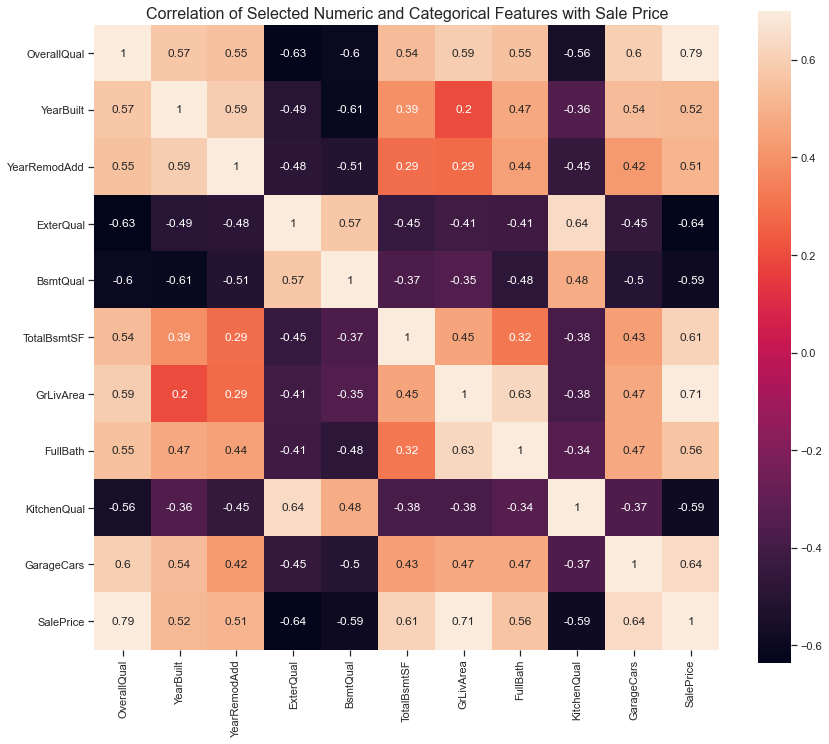

In [37]:
# Correlation Heat Map
plt.figure(figsize=(14,12))
plt.title("Correlation of Selected Numeric and Categorical Features with Sale Price", y=1, size=16)
sns.heatmap(train.corr(), annot=True, square= True, vmax=0.7)

In [38]:
[corrMatrix > 0.7]

[              OverallQual  YearBuilt  YearRemodAdd  ExterQual  BsmtQual  \
 OverallQual          True      False         False      False     False   
 YearBuilt           False       True         False      False     False   
 YearRemodAdd        False      False          True      False     False   
 ExterQual           False      False         False       True     False   
 BsmtQual            False      False         False      False      True   
 TotalBsmtSF         False      False         False      False     False   
 GrLivArea           False      False         False      False     False   
 FullBath            False      False         False      False     False   
 KitchenQual         False      False         False      False     False   
 GarageCars          False      False         False      False     False   
 SalePrice            True      False         False      False     False   
 
               TotalBsmtSF  GrLivArea  FullBath  KitchenQual  GarageCars  \
 OverallQu

Confirmed through correlation matrix and heat map that chosen features are not highly correlated with one another (i.e. less than 0.7 in this case)

In [39]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,SalePrice
0,7,2003,2003,2,2,856,1710,2,2,2,208500
1,6,1976,1976,3,2,1262,1262,2,3,2,181500
2,7,2001,2002,2,2,920,1786,2,2,2,223500
3,7,1915,1970,3,4,756,1717,1,2,3,140000
4,8,2000,2000,2,2,1145,2198,2,2,3,250000


In [40]:
train.shape

(1460, 11)

## Modelling

In [41]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [42]:
train.shape, test.shape

((1460, 11), (1459, 10))

In [43]:
# Reshape the data
test.drop(test.index[1458], inplace=True)
train.shape, test.shape

((1460, 11), (1458, 10))

In [44]:
# Prepare data for modeling. Remove SalePrice from train data as it is the target we are predicting. Define it as y
X= train.drop("SalePrice", axis=1)
y= train.SalePrice

# Split the data and check the shape of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 10), (438, 10), (1022,), (438,))

In [45]:
# Instantiate the model
linreg= LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Make predictions
pred_test = linreg.predict(X_test)

In [46]:
# Get the coefficient and intercept of the model
print(linreg.intercept_)
print(linreg.coef_)

-409646.1357023079
[ 15451.00807715    142.88948806     83.08006973  -9412.48006034
  -5398.38325536     24.73426622     47.76689643  -5113.25982967
 -11786.0507777   14562.12459364]


In [47]:
# Pair the feature name with the coefficient
list(zip(train, linreg.coef_))

[('OverallQual', 15451.008077149258),
 ('YearBuilt', 142.88948805530308),
 ('YearRemodAdd', 83.08006972697885),
 ('ExterQual', -9412.480060337923),
 ('BsmtQual', -5398.383255355569),
 ('TotalBsmtSF', 24.734266221636283),
 ('GrLivArea', 47.76689643180649),
 ('FullBath', -5113.259829674566),
 ('KitchenQual', -11786.050777699933),
 ('GarageCars', 14562.124593636214)]

In [48]:
# Print R square to check % of variability in Y that can be explained using X.
print("R Square ", linreg.score(X_test, y_test))

R Square  0.782308562085325


In [49]:
# Mean Absolute Deviation
print("MAE:", metrics.mean_absolute_error(pred_test, y_test))

MAE: 22549.54452435327


In [50]:
# Mean Square Error
print("MSE:", metrics.mean_squared_error(pred_test, y_test))

MSE: 1235353299.9049046


In [51]:
# Root Mean square Error
print("RMSE:", np.sqrt(metrics.mean_squared_error(pred_test, y_test)))
# Our model was able to predict the value of every house in the test set within $35147 of the real price.

RMSE: 35147.593088359616


Based on R Square, for this model, 78% of variability in Y that can be explained using X. 
Based on RMSE, this model was able to predict the value of every house in the test set within $35147 of the real price.